In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


---

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x1000 with 0 Axes>

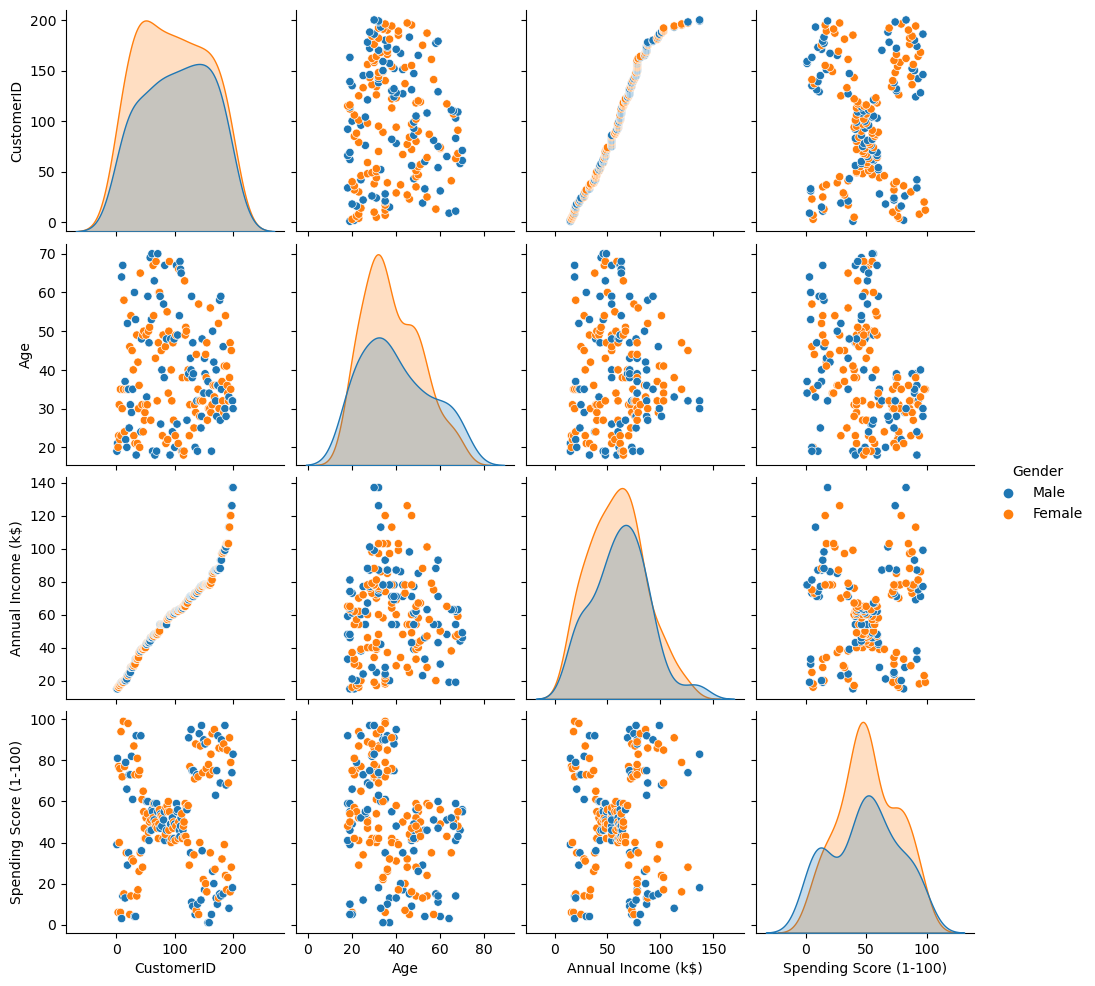

In [8]:
plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue='Gender')
plt.show()

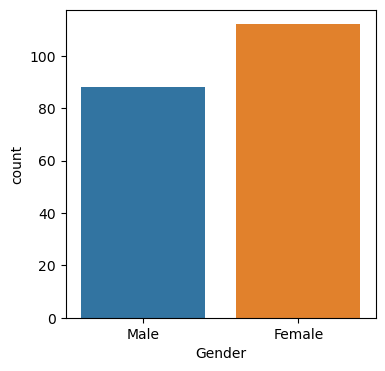

In [9]:
plt.figure(1, figsize=(4,4))
sns.countplot(x='Gender', data=df)
plt.show()

C:\Users\arvin\AppData\Local\Temp\ipykernel_7512\2056454749.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins=10)
C:\Users\arvin\AppData\Local\Temp\ipykernel_7512\2056454749.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins=10)
C:\Users\arvin\AppData\Local\Temp\ipyk

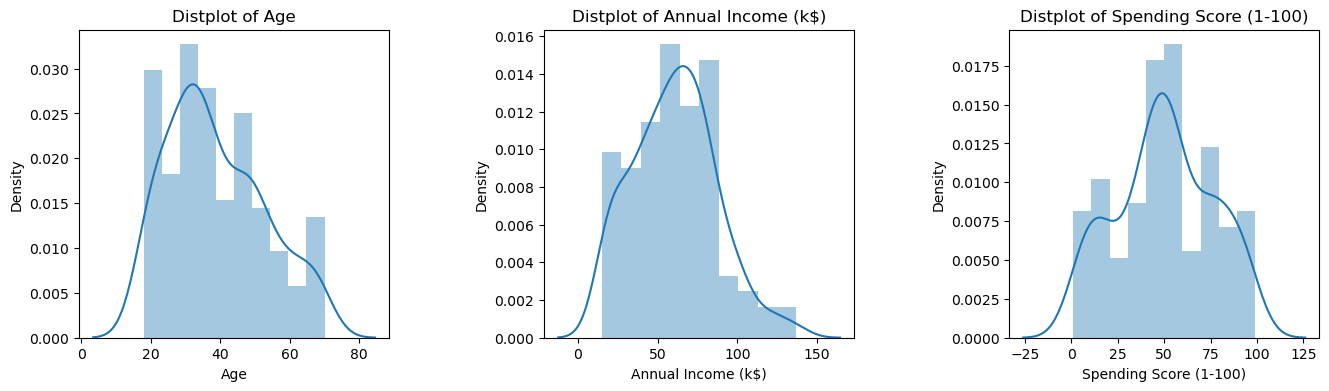

In [10]:
plt.figure(1, figsize=(16,4))
n = 0 
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(df[x] , bins=10)
    plt.title('Distplot of {}'.format(x))
plt.show()

---

In [11]:
X = df.iloc[:, -2:]

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

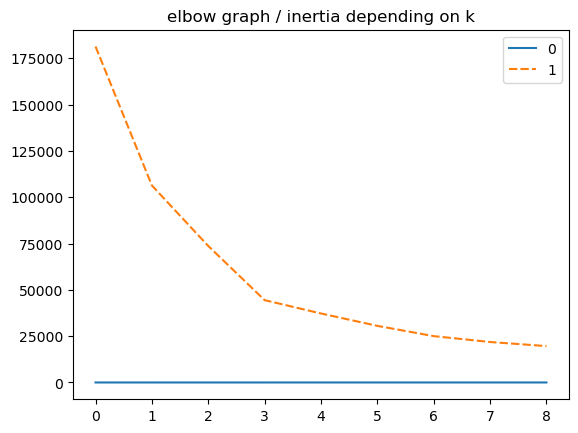

In [12]:
km_inertias, km_scores = [], []

for k in range(2, 11):
    km = KMeans(n_clusters=k).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))
    
sns.lineplot(data=(range(2, 11), km_inertias))
plt.title('elbow graph / inertia depending on k')
plt.show()

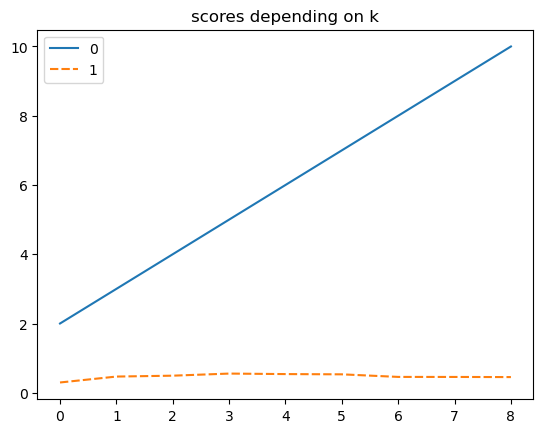

In [13]:
sns.lineplot(data=(range(2, 11), km_scores))
plt.title('scores depending on k')
plt.show()

In [14]:
X = df.iloc[:, -3:]

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

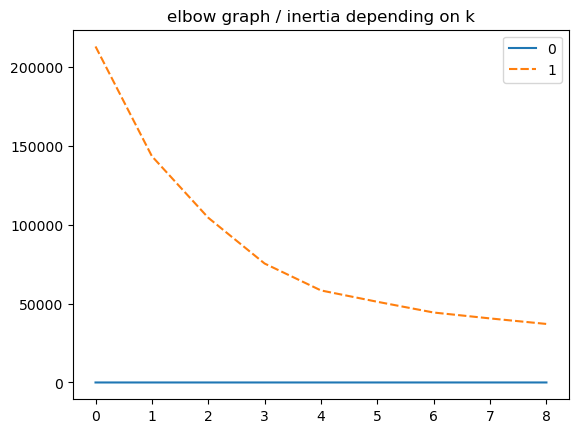

In [15]:
km_inertias, km_scores = [], []

for k in range(2, 11):
    km = KMeans(n_clusters=k).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))
    
sns.lineplot(data=(range(2, 11), km_inertias))
plt.title('elbow graph / inertia depending on k')
plt.show()

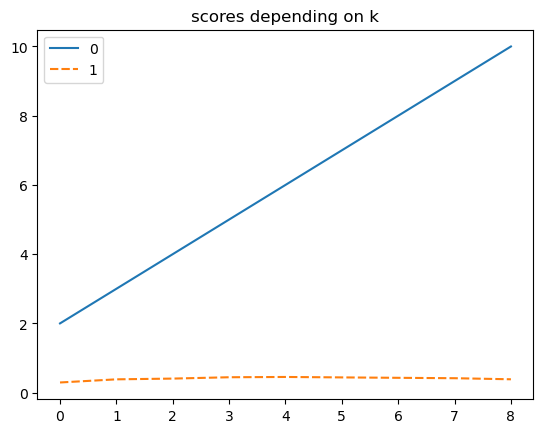

In [16]:
sns.lineplot(data=(range(2, 11), km_scores))
plt.title('scores depending on k')
plt.show()

In [17]:
km = KMeans(n_clusters=5).fit(X)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


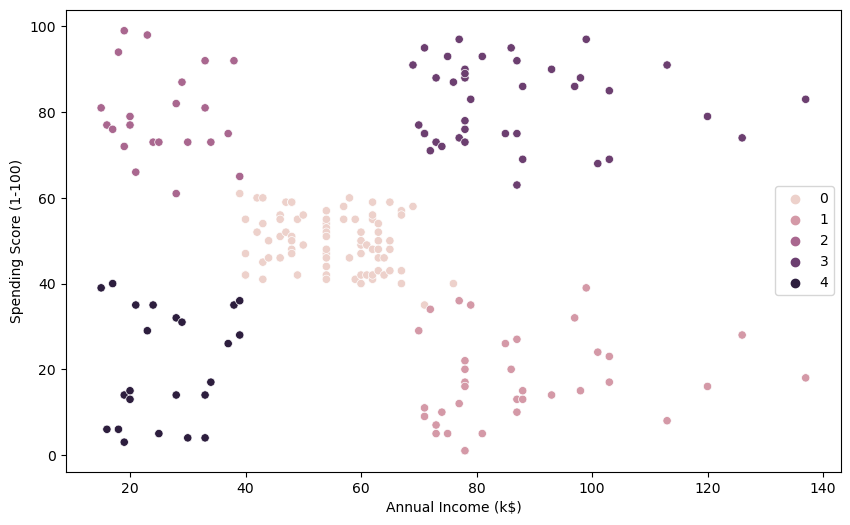

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 1],y=X.iloc[:, 2], hue=km.labels_)
plt.show()

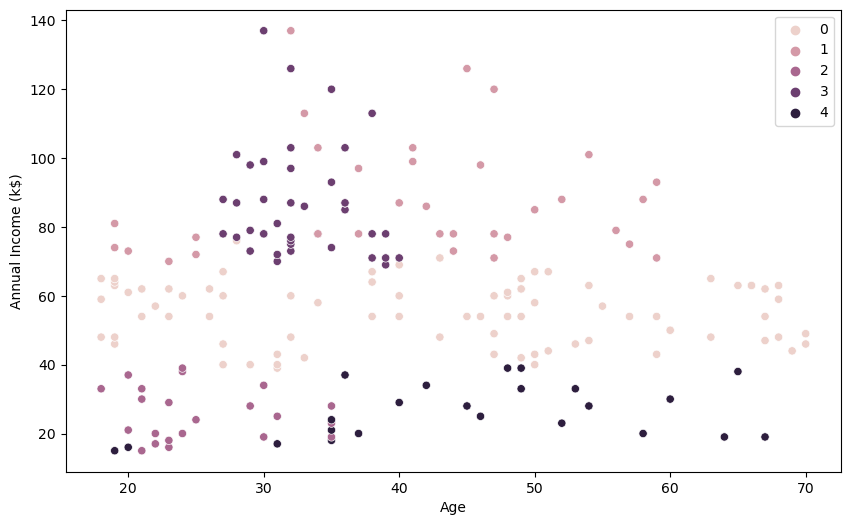

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0],y=X.iloc[:, 1], hue=km.labels_)
plt.show()

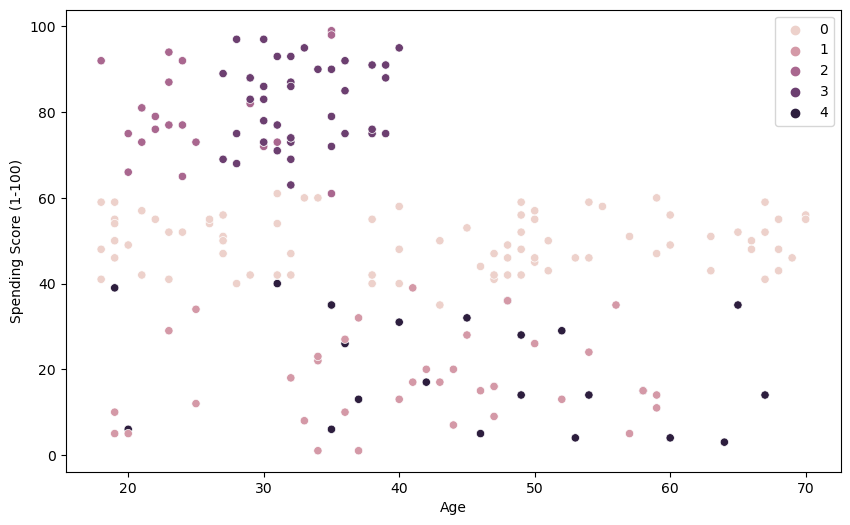

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0],y=X.iloc[:, 2], hue=km.labels_)
plt.show()

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

xs = X.iloc[:, 0]
ys = X.iloc[:, 1]
zs = X.iloc[:, 2]
ax.scatter(xs, ys, zs, s=50, alpha=0.6, c=km.labels_)

ax.set_xlabel('Age')
ax.set_ylabel('Annual income')
ax.set_zlabel('Spending score')

plt.show()

<Figure size 800x800 with 0 Axes>

In [22]:

X['label'] = km.labels_

In [23]:
X.label.value_counts()

label
0    80
3    39
1    36
4    23
2    22
Name: count, dtype: int64

In [24]:
for k in range(5):
    print(f'cluster nb : {k}')
    print(X[X.index == k].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

cluster nb : 0
        Age  Annual Income (k$)  Spending Score (1-100)
count   1.0                 1.0                     1.0
mean   19.0                15.0                    39.0
min    19.0                15.0                    39.0
max    19.0                15.0                    39.0



cluster nb : 1
        Age  Annual Income (k$)  Spending Score (1-100)
count   1.0                 1.0                     1.0
mean   21.0                15.0                    81.0
min    21.0                15.0                    81.0
max    21.0                15.0                    81.0



cluster nb : 2
        Age  Annual Income (k$)  Spending Score (1-100)
count   1.0                 1.0                     1.0
mean   20.0                16.0                     6.0
min    20.0                16.0                     6.0
max    20.0                16.0                     6.0



cluster nb : 3
        Age  Annual Income (k$)  Spending Score (1-100)
count   1.0                 1.0    

In [25]:
X[X.index == 1].describe().iloc[[0, 1, 3, 7], :-1]

,Age,Annual Income (k$),Spending Score (1-100)
count,1.0,1.0,1.0
mean,21.0,15.0,81.0
min,21.0,15.0,81.0
max,21.0,15.0,81.0
